# Sentiment Analysis for Financial News - Exploratory Data Analysis

This notebook contains the exploratory data analysis for Coursera's Advanced Data Science Capstone project. The focus in this task is to explore the data in order to identify quality issues (e.g. missing values, wrong measurements), assess feature quality (e.g. use correlation matrix), and  get an idea on the value distribution of the data using statistical measures and visualizations.


## Preparation

In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from plotly.offline import iplot

pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rico.pircklen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rico.pircklen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rico.pircklen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



## Data source

The data used for this project is publicly available at Kaggle: https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news/metadata.

Acknowledgements: Malo, P., Sinha, A., Korhonen, P., Wallenius, J., & Takala, P. (2014). Good debt or bad debt: Detecting semantic orientations in economic texts. 
Journal of the Association for Information Science and Technology, 65(4), 782-796.

## Uploading the data

In [4]:
# The code was removed by Watson Studio for sharing.

,sentiment,title
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


## Data Preprocessing

In [5]:
# Function to clean the titles
stopword_set = set(stopwords.words('english'))
forbidden_words = ["``", "''", "--", "'s"]
lemmatizer = WordNetLemmatizer() 

def lowercase(text):
    return str(text).lower()

def joinText(text):
    return " ".join(text)

def cleanText(text):
    text=lowercase(text)
    # Remove words with numbers
    text = re.sub('\w*\d\w*', '', text)
    # Tokenize
    text=word_tokenize(text)
    
    clean_text = []
    for w in text:
        if w not in stopword_set and w not in forbidden_words and w not in punctuation:
            w = lemmatizer.lemmatize(w)
            clean_text.append(w)

    clean_text=joinText(clean_text)
    return clean_text

df['title'] = df['title'].map(lambda text: cleanText(text))
df.head()


,sentiment,title
0,neutral,according gran company plan move production russia although company growing
1,neutral,technopolis plan develop stage area le square meter order host company working computer technology telecommunication statement said
2,negative,international electronic industry company elcoteq laid ten employee tallinn facility contrary earlier layoff company contracted rank office worker daily postimees reported
3,positive,new production plant company would increase capacity meet expected increase demand would improve use raw material therefore increase production profitability
4,positive,according company updated strategy year basware target long-term net sale growth range operating profit margin net sale


## Data Quality

In [6]:
# Count rows with empty fields
nonNull_df = df.dropna()
print("Number of rows with missing values is: ", df.shape[0] - nonNull_df.shape[0])

Number of rows with missing values is:  0


From the check above can be seen that each title had some text, and each sample was labelled.

In [7]:
# Manual checking of correct labelling

df.groupby('sentiment').apply(lambda x: x.sample(5)).reset_index(drop=True)

,sentiment,title
0,negative,cencorp net sale first quarter estimated .- compared first quarter
1,negative,growth rate paying national debt extremely painful
2,negative,seawind en route finnish port turku stockholm got stuck ice already around p.m. wednesday regal star journey swedish port kapellskar paldiski northwestern estonia cut short a.m. thursday
3,negative,nokia u.s. share percent lower gmt
4,negative,go bed worrying every night said
5,neutral,alexandria va. oct. hans-otto scheck espoo finland developed method identifying remote radio unit communication system
6,neutral,neomarkka played leading role group aim restart production specialty cellulose fiber valkeakoski
7,neutral,program started summer originally estimated last approximately two year
8,neutral,one one time targeted june guess pushed back maybe 're crazy feel like n't leaked enough meet date point
9,neutral,platen edge contact band provided seal protrusion directed towards middle area platen mean provided exert maintain pressure volume defined platen band seal


From the above manual checking could be concluded that the titles seem to be mostly correctly labelled. However, titles at indices 6 and 8 sound positive but are labelled as neutral showing that the training and validation data may contain some misclassified samples.

It would be advisable to review higher amount of samples (e.g. 100), but for this project, a smaller amount is considered sufficient.

## Data Analysis

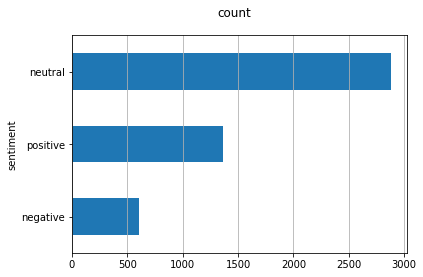

In [8]:
# Check the amount of data points per category
fig, ax = plt.subplots()
fig.suptitle("count", fontsize=12)
df["sentiment"].reset_index().groupby("sentiment").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

Text(0.5, 0.98, '')

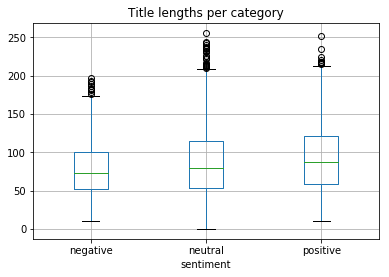

In [9]:
# Boxplot the title lengths per category
df['title_len'] = df['title'].astype(str).apply(len)
df.head()
df.boxplot(column='title_len', by='sentiment')
plt.title("Title lengths per category" )
plt.suptitle('')

From the figure above can be seen that the title lengths are somewhat similar between different categories. Positive titles are on average a bit longer than neutral and negative titles. It is also worth noticing that neutral sentiment has the most outliers.

Text(0.5, 1.0, 'Most common words after removing stopwords')

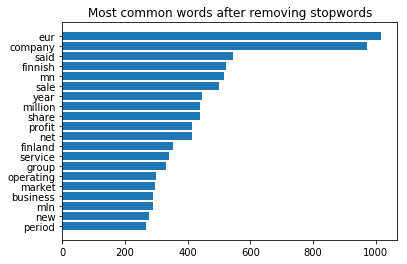

In [10]:
# Check most common words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['title'], 20)

df1=pd.DataFrame(common_words, columns = ['word' , 'count'])

fig, ax = plt.subplots()
plt.barh(df1["word"], df1["count"])
plt.gca().invert_yaxis()
plt.title("Most common words after removing stopwords")


From the above figure can be seen that "eur" and "company" were much more commonly used in titles than any other word. It is worth noticing, that Eur, Finnish and Finland were in the top 20 most common words, which indicates that the original data source for the news articles is most likely a media that focuses on Finnish businesses. This can also be noticed from the previously presented samples that contained names of Finnish companies.